# The Famous cats vs dogs problem using CNN

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
import numpy as np
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics as metrics

In [3]:
import os
from PIL import Image
from keras.preprocessing import image
from collections import Counter
from sklearn.preprocessing import StandardScaler


In [4]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [5]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9841273397439850718
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1425158553
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2105477175501629368
physical_device_desc: "device: 0, name: GeForce GT 1030, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [6]:
tf.device(device_name_or_function="/device:GPU:0")

In [7]:
tf.test.gpu_device_name()


'/device:GPU:0'

In [20]:
classifier = Sequential()

In [21]:
classifier.add(Conv2D(32, (3, 3),  input_shape=(32, 32, 3), padding='same', activation="relu" ))

In [22]:
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))

In [23]:
# classifier.add(BatchNormalization())

In [24]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [25]:
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))

In [26]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [27]:
classifier.add(Conv2D(128, (3, 3), padding='same', activation = 'relu'))

In [28]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [29]:
classifier.add(Flatten())

In [30]:
classifier.add(Dense(activation="relu", units=1024))

In [31]:
classifier.add(Dense(activation="relu", units=256))

In [32]:
classifier.add(Dense(activation="softmax", units=50))

In [33]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [34]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 128)        

**now we finished the CNN architecture, and now we will fit the NN to our images and use keras for data augmentation since we have a relatively small dataset**

In [35]:


# copied from the keras official doctumentation
# applying data generation (augmentation) to train set:
train_datagen = ImageDataGenerator(
        rescale=1./255,
#         rotation_range=15
            )

# applying data generation (augmentation) to test set:
test_datagen = ImageDataGenerator(rescale=1./255)

# preprocessing for trainig set
train_set = train_datagen.flow_from_directory(
        '../facial_recognition_CNN/IPdataset/training', # specifying directory for trainig data
        target_size=(32, 32), # seting the size for the images according to architecture (input 64x64)
        batch_size=32,
        class_mode='categorical'
        )

# preprocessing for test set
test_set = test_datagen.flow_from_directory('../facial_recognition_CNN/IPdataset/testing',
                                            target_size=(32, 32),
                                            batch_size=32,
                                            shuffle=False,
                                            class_mode='categorical'
                                            )

Found 11333 images belonging to 50 classes.
Found 2795 images belonging to 50 classes.


In [36]:
# keeping the best parameters
filepath = "bestWeights.hdf5"
checkpoint = ModelCheckpoint(filepath,
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max')

In [37]:
# this function is used in case we used a generator in case of normal data use we use only fit()
classifier.fit_generator(
                    train_set,
                    steps_per_epoch=355,
                    epochs=25,
                    callbacks=[checkpoint],
                    validation_data=test_set,
                    validation_steps=88)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/25
355/355 [==============================] - 20s 55ms/step - loss: 3.6367 - acc: 0.0488 - val_loss: 3.3521 - val_acc: 0.1013

Epoch 00001: val_acc improved from -inf to 0.10125, saving model to bestWeights.hdf5
Epoch 2/25
355/355 [==============================] - 12s 34ms/step - loss: 3.0222 - acc: 0.1511 - val_loss: 2.7898 - val_acc: 0.2143

Epoch 00002: val_acc improved from 0.10125 to 0.21431, saving model to bestWeights.hdf5
Epoch 3/25
355/355 [==============================] - 12s 33ms/step - loss: 2.5200 - acc: 0.2548 - val_loss: 2.4366 - val_acc: 0.2744

Epoch 00003: val_acc improved from 0.21431 to 0.27442, saving model to bestWeights.hdf5
Epoch 4/25
355/355 [==============================] - 12s 33ms/step - loss: 2.1350 - acc: 0.3584 - val_loss: 1.9708 - val_acc: 0.4068

Epoch 00004: val_acc improved from 0.27442 to 0.40680, saving model to bestWeights.hdf5
Epoch 5/25
355/3

### Model load

In [5]:
# loading the model ( best model)
# classifier = load_model('folds/fold5.hdf5')








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [41]:
#confusion matrix

In [38]:

np.set_printoptions(threshold=sys.maxsize)
Y_pred = classifier.predict_generator(test_set, 88)
y_pred = np.argmax(Y_pred, axis=1)
conf_mat = confusion_matrix(test_set.classes, y_pred)
print(conf_mat)

[[32  0  1  0  0  0  0  0  6  0  1  0  0  0  0  0  0  2  0  0  0  0  0  0
   1  1  0  0  0  0  0  0  0  1  2  0  0  0  0  0  0  0  0  0  0  2  0  1
   0  8]
 [ 0 42  0  0  0  0  0  0  0  0  1  2  0  0  0  1  0  0  0  0  0  0  0  0
   0  0  0  0  1  0  0  0  0  0  0  0  0  0  3  0  0  0  1  0  0  0  0  0
   0  0]
 [ 2  0 41  0  0  0  0  0  3  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0  0  1  0  1  2  0  0
   0  2]
 [ 0  0  0 39  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0  0  0  1  0  0  0  1  0  3  0  0  0  0  0  0  0  1  0  0  0  0  0
   0  0]
 [ 0  0  0  0 44  2  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  1  1
   1  0  0  0  0  0  0  0  1  0  0  2  1  0  0  0  0  1  0  0  1  3  0  0
   0  0]
 [ 2  0  0  0  0 36  2  0  0  2  0  0  0  1  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  1  0  0  0  3  1  1  0  0  1  1  0  0  0  3  1  0  3
   0  0]
 [ 4  0  1  0  0  1 28  0  0  0  2  0  0  0  0  1  0  0  0

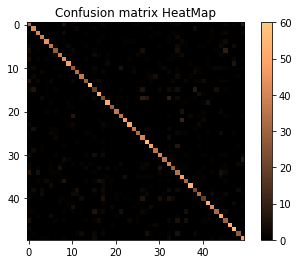

In [39]:

plt.imshow(conf_mat, cmap='copper')
plt.colorbar()
plt.title('Confusion matrix HeatMap')
plt.savefig('confMat.jpg', format='jpg', dpi=1200)

In [40]:
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())  

In [41]:

report = metrics.classification_report(true_classes, y_pred, target_names=class_labels)
print(report) 

              precision    recall  f1-score   support

         s01       0.37      0.55      0.44        58
         s02       0.65      0.82      0.72        51
         s03       0.77      0.73      0.75        56
         s04       0.75      0.85      0.80        46
         s05       0.88      0.73      0.80        60
         s06       0.64      0.62      0.63        58
         s07       0.65      0.50      0.57        56
         s08       0.76      0.63      0.69        60
         s09       0.62      0.72      0.67        60
         s10       0.84      0.80      0.82        60
         s11       0.49      0.49      0.49        57
         s12       0.74      0.68      0.71        50
         s13       0.80      0.71      0.76        52
         s14       0.74      0.48      0.59        60
         s15       0.97      1.00      0.98        60
         s16       0.35      0.32      0.33        60
         s17       0.77      0.88      0.82        60
         s18       0.39    

In [42]:
# code without poids

In [43]:

dataset_path = '../facial_recognition_CNN/IPdatasetTesting2/'

dataset_files = os.listdir(dataset_path)

# vector to store the classes of each image
classes_vect = np.zeros(150, dtype=int) 



current_class = 0

for folder in dataset_files:
    folder_path = dataset_path + folder
    
    sub_folder = os.listdir(folder_path)
    
    current_image_index = 0
    for file in sub_folder:
        
        sub_images = os.listdir(folder_path + '/' + file)
        
        vect = np.zeros(len(sub_images))
        current_ROI_index = 0
        
        for image_name in sub_images:
            sub_image_path = folder_path + '/' + file + '/' + image_name
#             print(sub_image_path)
            img = image.load_img(sub_image_path)
            img  = image.img_to_array(img)  / 255.0 
            img  = img.reshape((1,) + img.shape)
            img_class=classifier.predict_classes(img)
            classname = int(img_class[0])
#             img_class_proba = classifier.predict(img)
#             print('image class pro', img_class_proba)
#             print('image class probb: ', img_class_proba[0][classname])
            vect[current_ROI_index] = classname
            current_ROI_index += 1
        print(vect)
        image_class = Counter(vect).most_common(1)
        print('image class :', int(image_class[0][0]))
#         image_class = np.bincount(vect).argmax()    
        if int(image_class[0][0]) == current_class:
            
            classes_vect[current_class * 3 + current_image_index] = 1          


        
        current_image_index += 1
    
    current_class += 1       
            
            
            

# img = image.load_img('C:/Users/Ouss/Desktop/facial_recognition_CNN/IPdatasetTesting2/s15/13.jpg/13.jpg.6.jpg')# , target_size=(32,32))
# img  = image.img_to_array(img)
# img  = img.reshape((1,) + img.shape)
# # # img  = img/255
# # img = img.reshape(-1,784)
# img_class=classifier.predict_classes(img) 

# prediction = img_class[0]
# classname = img_class[0]
# print("Class: ",classname)

[24.  0.  0.  0.  0.  0.  8. 45.  2.  0.  0.  0.  0.  0. 45. 47.  8.  0.
 49.  0.]
image class : 0
[ 0. 49.  0. 49. 25. 34.  0.  0. 49.  0.  0.  0. 49.  0.  0.  0.  0.  0.
  0.  0.]
image class : 0
[ 8.  0.  0. 17.  8. 49.  8.  8. 34. 49.  0.  0.  0. 17. 49.  0. 33. 10.]
image class : 0
[ 1.  1.  1. 15.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
image class : 1
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1. 42.  1.  1.  1.  1.  1.]
image class : 1
[11. 11.  1.  1. 38.  1.  1.  1.  1. 38. 10. 38.  1.  1.  1. 28.  1.]
image class : 1
[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2. 33.  8.  2.  2.  2.  2.  2. 49.
  8.  2.]
image class : 2
[44.  2.  2.  2.  2.  2.  2. 42.  2.  2.  2.  2.  2.  2.  2.  2.]
image class : 2
[ 2.  2. 30.  2.  2.  2. 45. 29. 49.  2. 13.  8.  0.  2.  2.  2. 45.  2.
  2.  0.]
image class : 2
[ 3.  3. 34. 32.  3.  3.  3.  3.  3.  3.  3. 17.  3.]
image class : 3
[ 3.  3. 42. 28.  3. 34.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
image class : 3
[ 3.  3.  3.  

[29. 29. 29. 29. 29.  1. 29. 29. 29.  3. 29. 29. 29. 29. 29. 29. 28.]
image class : 29
[13. 17. 30. 15. 30. 30. 30. 30. 30.  0. 30. 30. 30. 30. 40. 30. 30. 30.
 30. 30.]
image class : 30
[17. 33. 15. 30. 30.  0. 30. 30. 49. 44. 30. 15. 30. 36.  0. 30. 30. 30.
 49. 30.]
image class : 30
[30. 30. 30. 30. 30. 30. 30.  6. 30. 17. 30. 45. 15. 30. 30. 30. 30. 30.
 30. 30.]
image class : 30
[31. 31. 31. 31. 31. 31. 31. 42. 31. 31. 31. 31. 49. 49. 31. 31. 49. 31.]
image class : 31
[49.  8. 49. 30.  8. 31. 49. 31. 31. 33. 32. 31. 31. 33. 31. 31. 31. 32.
  9.]
image class : 31
[49.  8. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31.]
image class : 31
[ 8. 49. 32. 14.  0. 32.  7. 32. 32. 32. 21. 30. 32. 32. 32. 32. 32. 32.
 32. 32.]
image class : 32
[32. 32. 32. 32.  0. 45. 32. 34. 10. 21. 32. 32. 32. 32. 32. 32. 32. 49.
 32. 32.]
image class : 32
[32. 32. 32. 32. 32. 12.  5. 27. 48. 32. 32. 48. 32. 32. 32. 32. 32. 26.
 32. 27.]
image class : 32
[33. 33.  7. 33. 33. 34. 33. 33. 33.  7. 45. 35

In [44]:
# calculating accuracy
classes_vect

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [45]:
accuracy_new = Counter(classes_vect).most_common(1)

In [46]:
accuracy_new[0][1] / 150            


0.9933333333333333

# method with weights

In [49]:

dataset_path = '../facial_recognition_CNN/IPdatasetTesting2/'

dataset_files = os.listdir(dataset_path)

classes_vect = np.zeros(150, dtype=int)

current_class = 0

# the folder contains the classes folders ex: s01, s02 ...
for folder in dataset_files:
    folder_path = dataset_path + folder
    
    sub_folder = os.listdir(folder_path)
    
    current_image_index = 0
    for file in sub_folder:
        
        sub_images = os.listdir(folder_path + '/' + file)
        
        # dictionnary that contains the classes of the images, keys are the class names, 
        #values is a list with 2 elements [proba of a class, nbr of occurances of that class ]
        vect = dict()
        current_ROI_index = 0
        
        for image_name in sub_images:
            sub_image_path = folder_path + '/' + file + '/' + image_name
            img = image.load_img(sub_image_path)
            img  = image.img_to_array(img)  / 255.0 
            img  = img.reshape((1,) + img.shape)
            img_class=classifier.predict_classes(img)
            # predicting the class name
            classname = int(img_class[0])
            # predicting the class probability
            img_class_proba = classifier.predict(img)
#             print('image class pro', img_class_proba)
#             print('image class probb: ', img_class_proba[0][classname])

            # if the class doesn't exist in the dictionnary add it 
            if not str(classname) in vect:
                vect[str(classname)] = [0, 0]
                
            # if the class exists in the dictionnary, we add its probablity and occurance
            vect[str(classname)][0] += img_class_proba[0][classname]
            vect[str(classname)][1] += 1
            
            current_ROI_index += 1
            
        print("vect: ", vect)
        # calculating the max appearances of a class in the dictionnary values
        max_appearance_class = max(np.array(list(vect.values()))[:, 1])
        # calculating if two or more classes have the same appearance -conflict-
        conflict_indicator = np.count_nonzero(np.array(list(vect.values()))[:, 1] == max_appearance_class)
        print('conflict indi : ', conflict_indicator)
        # if there is a conflict we use the weights method, else we only use the max appearance of a class in the dictionnary
        if conflict_indicator > 1:
            image_class = int(list(vect.keys())[np.argmax(np.array(list(vect.values()))[:, 0])])
        else:    
            image_class = int(list(vect.keys())[np.argmax(np.array(list(vect.values()))[:, 1])])
            
            
        print('image class :', image_class)  
        # checking if the class is correct
        if image_class == current_class:
            
            classes_vect[current_class * 3 + current_image_index] = 1 
        
        current_image_index += 1
    
    current_class += 1       
            
            

vect:  {'24': [0.2912147343158722, 1], '0': [11.284773111343384, 12], '8': [1.4645265340805054, 2], '45': [1.9999743700027466, 2], '2': [0.9614085555076599, 1], '47': [0.9985087513923645, 1], '49': [0.9724652767181396, 1]}
conflict indi :  1
image class : 0
vect:  {'0': [13.423927307128906, 14], '49': [3.731403112411499, 4], '25': [0.690173864364624, 1], '34': [0.6948451995849609, 1]}
conflict indi :  1
image class : 0
vect:  {'8': [2.9324910044670105, 4], '0': [5.360320806503296, 6], '17': [1.313904732465744, 2], '49': [2.1429080069065094, 3], '34': [0.8198637366294861, 1], '33': [0.5278896689414978, 1], '10': [0.4158964455127716, 1]}
conflict indi :  1
image class : 0
vect:  {'1': [16.047766655683517, 17], '15': [0.5748462080955505, 1]}
conflict indi :  1
image class : 1
vect:  {'1': [13.625584244728088, 15], '42': [0.4532080888748169, 1]}
conflict indi :  1
image class : 1
vect:  {'11': [1.5290212631225586, 2], '1': [8.74451893568039, 10], '38': [2.078024744987488, 3], '10': [0.9926

vect:  {'12': [11.523256361484528, 13], '1': [0.7855894565582275, 1], '34': [1.4328548312187195, 2], '29': [1.905463695526123, 2]}
conflict indi :  1
image class : 12
vect:  {'13': [11.188080489635468, 14], '38': [0.26182419061660767, 1], '33': [0.6828000545501709, 1], '28': [0.8052151799201965, 1], '2': [0.5421291589736938, 1], '0': [1.487798273563385, 2]}
conflict indi :  1
image class : 13
vect:  {'40': [1.6970879435539246, 2], '5': [1.1549853086471558, 2], '0': [0.520697832107544, 1], '16': [2.5739684104919434, 3], '33': [0.39184439182281494, 1], '36': [1.436702698469162, 2], '44': [0.5036133527755737, 1], '10': [0.9344512224197388, 1], '45': [0.6968309879302979, 1], '15': [1.6127208471298218, 2], '39': [0.9362497925758362, 1], '13': [1.508650779724121, 2], '2': [0.9986489415168762, 1]}
conflict indi :  1
image class : 16
vect:  {'13': [12.286673963069916, 13], '0': [3.4672962427139282, 4], '26': [0.4703867435455322, 1], '40': [0.6782321333885193, 1], '10': [0.9893394112586975, 1]}

vect:  {'28': [16.869928419589996, 17], '34': [1.856162667274475, 2], '48': [0.707190215587616, 1]}
conflict indi :  1
image class : 28
vect:  {'28': [15.72823429107666, 16], '32': [0.935958981513977, 1], '3': [0.47076529264450073, 1], '8': [0.7128971219062805, 1], '34': [0.6511428356170654, 1]}
conflict indi :  1
image class : 28
vect:  {'29': [11.160261034965515, 12], '1': [0.9552741646766663, 1]}
conflict indi :  1
image class : 29
vect:  {'29': [8.925224125385284, 9], '1': [0.8021842241287231, 1], '17': [0.6414105892181396, 1], '28': [0.35681238770484924, 1]}
conflict indi :  1
image class : 29
vect:  {'29': [13.249061703681946, 14], '1': [0.9855775237083435, 1], '3': [0.9752736687660217, 1], '28': [0.7435582280158997, 1]}
conflict indi :  1
image class : 29
vect:  {'13': [0.7782915830612183, 1], '17': [0.948908269405365, 1], '30': [13.217861831188202, 15], '15': [0.9660696387290955, 1], '0': [0.6196478605270386, 1], '40': [0.5305613279342651, 1]}
conflict indi :  1
image class : 3

vect:  {'8': [0.764604389667511, 1], '40': [7.543535470962524, 8], '32': [0.3572622537612915, 1], '17': [1.435728371143341, 3], '38': [0.5013907551765442, 1], '26': [1.4571292102336884, 2], '12': [2.245060473680496, 3], '20': [0.930404007434845, 1]}
conflict indi :  1
image class : 40
vect:  {'30': [0.8645996451377869, 1], '33': [0.9944530129432678, 1], '40': [3.482279062271118, 5], '27': [0.45638835430145264, 1], '26': [0.6376906037330627, 1], '7': [0.996845543384552, 1], '3': [0.7804315090179443, 1], '17': [0.18028032779693604, 1], '32': [1.7960482239723206, 2], '44': [0.9876692891120911, 1]}
conflict indi :  1
image class : 40
vect:  {'41': [17.44450157880783, 18], '39': [0.48604461550712585, 1], '25': [0.9827013611793518, 1]}
conflict indi :  1
image class : 41
vect:  {'41': [17.516785383224487, 18], '7': [0.5121419429779053, 1], '47': [0.9933720827102661, 1]}
conflict indi :  1
image class : 41
vect:  {'47': [0.975246012210846, 1], '41': [15.831469297409058, 16], '10': [0.19521898

In [50]:
classes_vect

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [51]:
accuracy_new = Counter(classes_vect).most_common(2)

In [52]:
accuracy_new[0][1] / 150

0.9933333333333333

### XGBoost model

In [6]:
classifier.layers[8].input

<tf.Tensor 'flatten_16/Reshape:0' shape=(?, ?) dtype=float32>

In [7]:
classifier2 = Sequential()

In [8]:
classifier2.add(classifier.layers[0])

In [9]:
classifier2.add(classifier.layers[1])

In [10]:
classifier2.add(classifier.layers[2])

In [11]:
classifier2.add(classifier.layers[3])

In [12]:
classifier2.add(classifier.layers[4])

In [13]:
classifier2.add(classifier.layers[5])

In [14]:
classifier2.add(classifier.layers[6])

In [15]:
classifier2.add(classifier.layers[7])

In [16]:
classifier2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 4, 4, 128)        

In [17]:
dataset_path = 'C:/Users/Ouss/Desktop/facial_recognition_CNN/IPdatasetTesting2/s01/13.jpg/13.jpg.0.jpg'
img = image.load_img(dataset_path)
img  = image.img_to_array(img)  / 255.0 
img  = img.reshape((1,) + img.shape)
img_class=classifier2.predict(img)

In [18]:
img_class[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [98]:
# loading train images to the xgboost and saving them along with their classes in vect
dataset_path = 'C:/Users/Ouss/Desktop/facial_recognition_CNN/IPdataset/training/'

dataset_files = os.listdir(dataset_path)

vect = [[], []]
current_class = 0

# the folder contains the classes folders ex: s01, s02 ...
for folder in dataset_files:
    folder_path = dataset_path + folder
    
    sub_folder = os.listdir(folder_path)
    
    for file in sub_folder:
        
        sub_image_path = folder_path + '/' + file 
        img = image.load_img(sub_image_path)
        img  = image.img_to_array(img)  / 255.0 
        img  = img.reshape((1,) + img.shape)
        img_class=classifier2.predict(img)
        
        vect[0].append(img_class[0])  
        vect[1].append(current_class)
        
    print('current class: ', current_class)
    current_class += 1 
         

current class:  0
current class:  1
current class:  2
current class:  3
current class:  4
current class:  5
current class:  6
current class:  7
current class:  8
current class:  9
current class:  10
current class:  11
current class:  12
current class:  13
current class:  14
current class:  15
current class:  16
current class:  17
current class:  18
current class:  19
current class:  20
current class:  21
current class:  22
current class:  23
current class:  24
current class:  25
current class:  26
current class:  27
current class:  28
current class:  29
current class:  30
current class:  31
current class:  32
current class:  33
current class:  34
current class:  35
current class:  36
current class:  37
current class:  38
current class:  39
current class:  40
current class:  41
current class:  42
current class:  43
current class:  44
current class:  45
current class:  46
current class:  47
current class:  48
current class:  49


In [99]:
x_train = vect[0]

In [100]:
y_train = vect[1]

In [41]:
# # normalisation 
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(x_train)


In [121]:
# # PCA
# pca = PCA(n_components=500)
# principalComponents = pca.fit_transform(x_train)

lda = LDA()
ldaXTrain = lda.fit_transform(x_train,y_train)


c:\users\ouss\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [97]:
# len(principalComponents[0])

500

In [124]:
dx_train = xgb.DMatrix(ldaXTrain, label=y_train)

In [125]:
dx_train

In [126]:
param = {
        'max_depth': 4,
        'eta': 0.3,
        'objective': 'multi:softmax',
        'num_class': 50, 
        'verbosity': 2,
        'nthread ': 4,
        'tree_method': 'hist'
        }
epochs = 25

In [127]:
xgb_model = xgb.train(param, dx_train, epochs)

[11:10:01] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[11:10:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[11:10:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[11:10:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[11:10:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11:10:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[11:10:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_dept

[11:10:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11:10:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[11:10:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[11:10:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11:10:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[11:10:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[11:10:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[11:10:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[11:10:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[11:10:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[11:10:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[11:10:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[11:10:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[11:10:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[11:10:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[11:10:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[11:10:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[11:10:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11:10:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11:10:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=4
[11:10:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[11:10:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11:10:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning en

[11:10:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[11:10:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11:10:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[11:10:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[11:10:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[11:10:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[11:10:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11:10:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[11:10:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[11:10:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[11:10:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11:10:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[11:10:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11:10:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[11:10:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[11:10:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[11:10:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[11:10:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[11:10:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11:10:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[11:10:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[11:10:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[11:10:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[11:10:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[11:10:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[11:10:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11:10:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning en

[11:10:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11:10:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[11:10:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[11:10:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[11:10:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[11:10:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[11:10:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[11:10:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[11:10:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=4
[11:10:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[11:10:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning en

[11:10:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[11:10:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[11:10:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11:10:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[11:10:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[11:10:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[11:10:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[11:10:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[11:10:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[11:10:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[11:10:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[11:10:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[11:10:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[11:10:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[11:10:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[11:10:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[11:10:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[11:10:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[11:10:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[11:10:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[11:10:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=4
[11:10:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[11:10:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning en

[11:10:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[11:10:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[11:10:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[11:10:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[11:10:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[11:10:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[11:10:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[11:10:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[11:10:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[11:10:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[11:10:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[11:10:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[11:10:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[11:10:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[11:10:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[11:10:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[11:10:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[11:10:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[11:10:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[11:10:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[11:10:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[11:10:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[11:10:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[11:10:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[11:10:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[11:10:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning en

In [105]:
# loading train images to the xgboost and saving them along with their classes in vect
dataset_path = 'C:/Users/Ouss/Desktop/facial_recognition_CNN/IPdataset/testing/'

dataset_files = os.listdir(dataset_path)

test_vect = [[], []]
current_class = 0

# the folder contains the classes folders ex: s01, s02 ...
for folder in dataset_files:
    folder_path = dataset_path + folder
    
    sub_folder = os.listdir(folder_path)
    
    for file in sub_folder:
        
        sub_image_path = folder_path + '/' + file 
        img = image.load_img(sub_image_path)
        img  = image.img_to_array(img)  / 255.0 
        img  = img.reshape((1,) + img.shape)
        img_class=classifier2.predict(img)
        
        test_vect[0].append(img_class[0])  
        test_vect[1].append(current_class)
        
    print('current class: ', current_class)
    current_class += 1 

current class:  0
current class:  1
current class:  2
current class:  3
current class:  4
current class:  5
current class:  6
current class:  7
current class:  8
current class:  9
current class:  10
current class:  11
current class:  12
current class:  13
current class:  14
current class:  15
current class:  16
current class:  17
current class:  18
current class:  19
current class:  20
current class:  21
current class:  22
current class:  23
current class:  24
current class:  25
current class:  26
current class:  27
current class:  28
current class:  29
current class:  30
current class:  31
current class:  32
current class:  33
current class:  34
current class:  35
current class:  36
current class:  37
current class:  38
current class:  39
current class:  40
current class:  41
current class:  42
current class:  43
current class:  44
current class:  45
current class:  46
current class:  47
current class:  48
current class:  49


In [106]:
x_test = test_vect[0]

In [107]:
y_test = test_vect[1]

In [85]:
# # normalisation 
# test_scaled_data = scaler.transform(x_test)


In [128]:
# test_principalComponents = pca.transform(x_test)
ldaX_test = lda.transform(x_test)

In [129]:
dx_test = xgb.DMatrix(ldaX_test, label=y_test)

In [130]:
preds = xgb_model.predict(dx_test)

In [131]:
from sklearn.metrics import accuracy_score

In [132]:
acc = accuracy_score(y_test, preds)

In [133]:
acc

0.5144901610017889

In [113]:
len(preds)

2795